# Machine Learning for Everybody – Full Course

https://youtu.be/i_LwzRVP7bg

https://archive.ics.uci.edu/ml/datasets/MAGIC+Gamma+Telescope


### Dataset:
Dua, D. and Graff, C. (2019). UCI Machine Learning Repository [http://archive.ics.uci.edu/ml]. Irvine, CA: University of California, School of Information and Computer Science.

Donated by:
P. Savicky
Institute of Computer Science, AS of CR
Czech Republic
savicky '@' cs.cas.cz

In [2]:
!curl --create-dir -O --output-dir ./data https://archive.ics.uci.edu/ml/machine-learning-databases/magic/magic04.data

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 1442k  100 1442k    0     0   405k      0  0:00:03  0:00:03 --:--:--  406k


# FCC Magic Example

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler

In [3]:
# 1. fLength: continuous # major axis of ellipse [mm]
# 2. fWidth: continuous # minor axis of ellipse [mm]
# 3. fSize: continuous # 10-log of sum of content of all pixels [in #phot]
# 4. fConc: continuous # ratio of sum of two highest pixels over fSize [ratio]
# 5. fConc1: continuous # ratio of highest pixel over fSize [ratio]
# 6. fAsym: continuous # distance from highest pixel to center, projected onto major axis [mm]
# 7. fM3Long: continuous # 3rd root of third moment along major axis [mm]
# 8. fM3Trans: continuous # 3rd root of third moment along minor axis [mm]
# 9. fAlpha: continuous # angle of major axis with vector to origin [deg]
# 10. fDist: continuous # distance from origin to center of ellipse [mm]
# 11. class: g,h # gamma (signal), hadron (background)

cols = ["fLength", "fWidth", "fSize", "fConc", "fConc1", "fAsym", "fM3Long", "fM3Trans", "fAlpha", "fDist", "class"]
df = pd.read_csv('data/magic04.data', names=cols)
df.head()

df['class'] = df['class'].map({'g': 1, 'h': 0})

df.head()

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,1
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,1
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,1
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,1
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,1


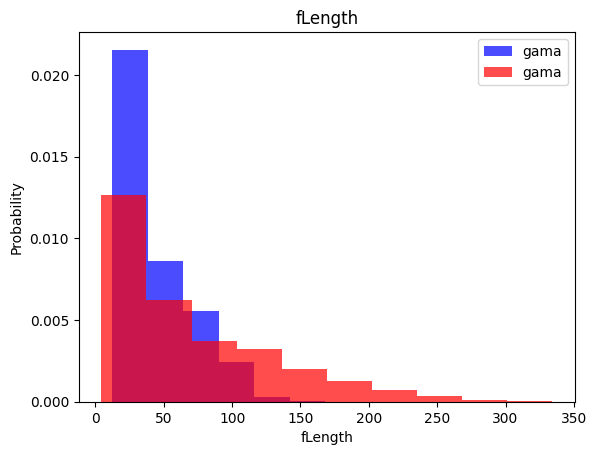

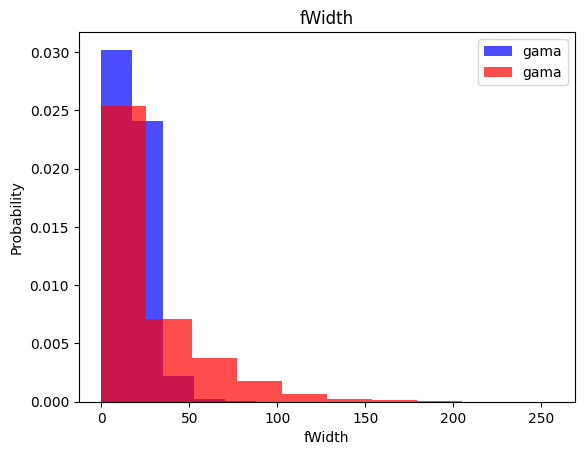

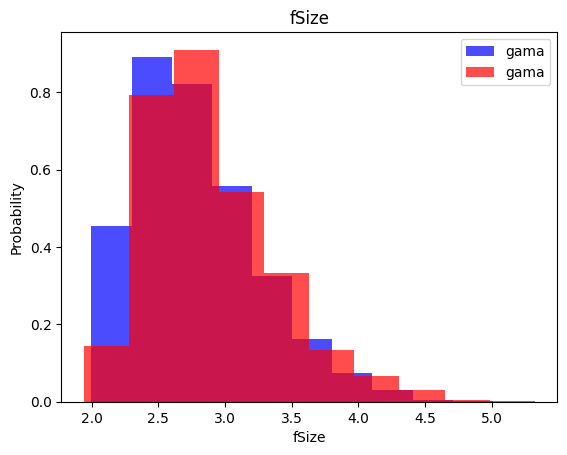

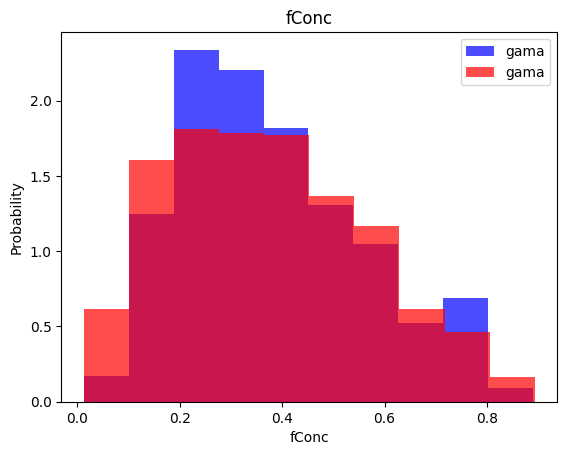

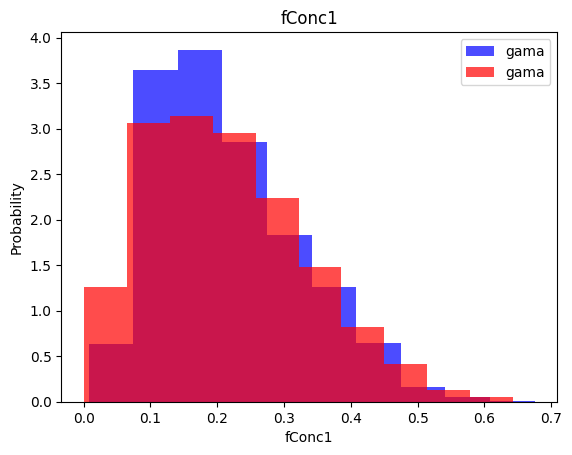

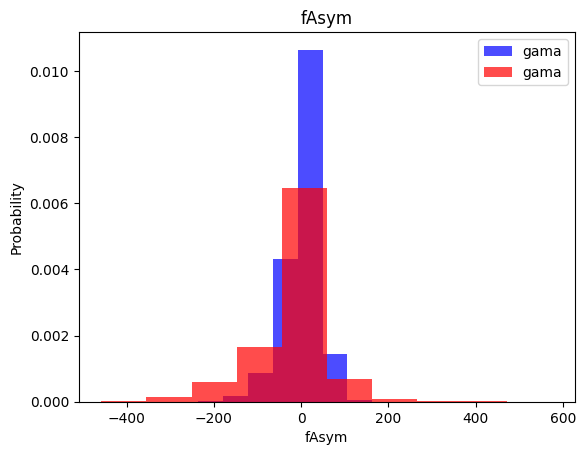

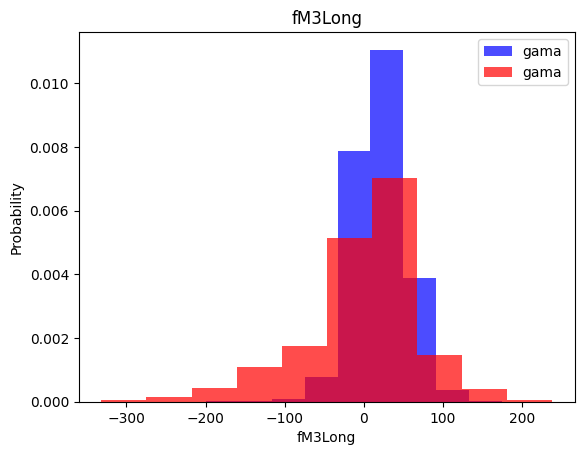

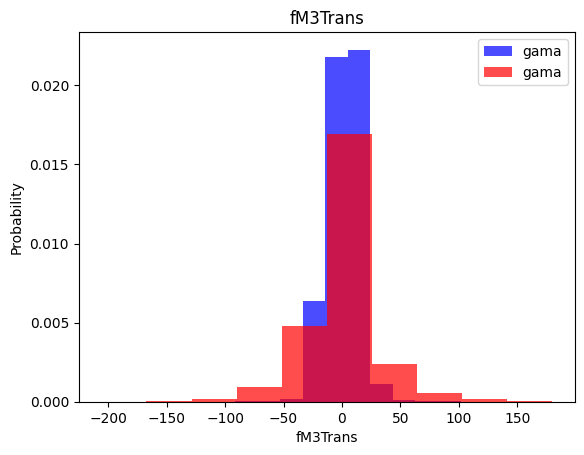

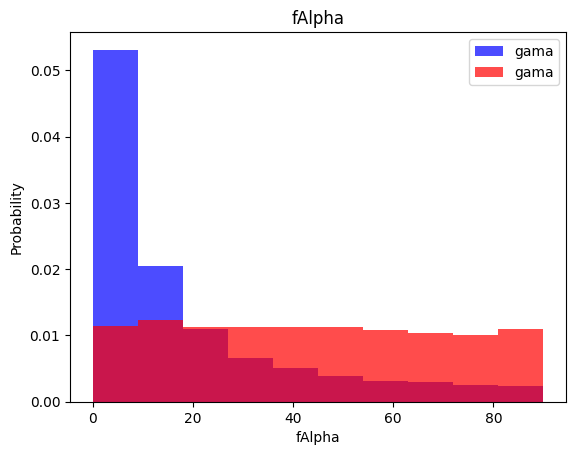

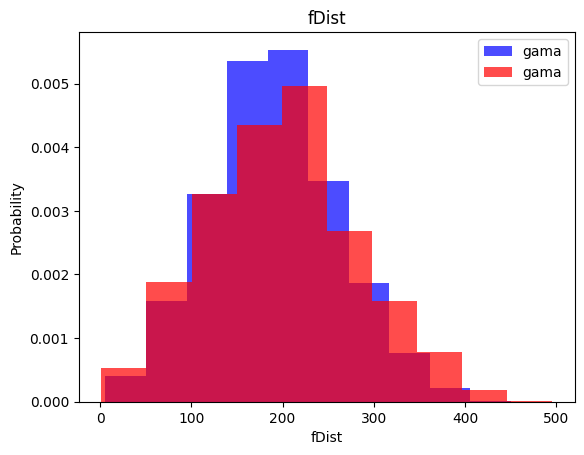

In [4]:
for label in cols[:-1]:
    plt.hist(df[df["class"]==1][label], color="blue", label="gama", alpha=0.7, density=True)
    plt.hist(df[df["class"]==0][label], color="red", label="gama", alpha=0.7, density=True)
    plt.title(label)
    plt.ylabel("Probability")
    plt.xlabel(label)
    plt.legend()
    plt.show()    

### Train, validation, test datasets

In [31]:
train, valid, test = np.split(df.sample(frac=1), [int(.6*len(df)), int(.8*len(df))])

In [29]:
def scale_dataset(dataframe, oversample=False):
    X = dataframe[dataframe.columns[:-1]].values
    y = dataframe[dataframe.columns[-1]].values
    
    scaler = StandardScaler()
    X = scaler.fit_transform(X)
    
    if oversample:
        ros = RandomOverSampler()
        X, y = ros.fit_resample(X, y)
    
    data = np.hstack((X, np.reshape(y, (-1, 1))))
    
    return data, X, y

In [32]:
train, X_train, y_train = scale_dataset(train, oversample=True)
valid, X_valid, y_valid = scale_dataset(valid, oversample=False)
test, X_test, y_test = scale_dataset(test, oversample=False)

print("gama", sum(y_train==1))
print("hadron", sum(y_train==0))

gama 7409
hadron 7409


## kNN

In [41]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

knn_model = KNeighborsClassifier(n_neighbors=3)
knn_model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [42]:
y_pred = knn_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.73      0.73      0.73      1341
           1       0.85      0.85      0.85      2463

    accuracy                           0.81      3804
   macro avg       0.79      0.79      0.79      3804
weighted avg       0.81      0.81      0.81      3804



## Naive Bayes

In [44]:
from sklearn.naive_bayes import GaussianNB

nb_model = GaussianNB()
nb_model = nb_model.fit(X_train, y_train)

In [46]:
y_pred = nb_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.69      0.41      0.52      1341
           1       0.74      0.90      0.81      2463

    accuracy                           0.73      3804
   macro avg       0.72      0.66      0.66      3804
weighted avg       0.72      0.73      0.71      3804



## Logistic Regression


In [54]:
from sklearn.linear_model import LogisticRegression

lg_model = LogisticRegression()
lg_model = lg_model.fit(X_train, y_train)

In [55]:
y_pred = lg_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.68      0.71      0.69      1341
           1       0.84      0.82      0.83      2463

    accuracy                           0.78      3804
   macro avg       0.76      0.76      0.76      3804
weighted avg       0.78      0.78      0.78      3804



## Support Vector Machines (SVM)

In [56]:
from sklearn.svm import SVC

svc_model = SVC()
svc_model = svc_model.fit(X_train, y_train)

In [57]:
y_pred = svc_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.79      0.79      0.79      1341
           1       0.88      0.89      0.89      2463

    accuracy                           0.85      3804
   macro avg       0.84      0.84      0.84      3804
weighted avg       0.85      0.85      0.85      3804



## Neural Networks

In [78]:
import tensorflow as tf

def train_model(X_train, y_train, X_val, y_val, num_nodes, dropout_prob, lr, batch_size, epochs):
    nn_model = tf.keras.models.Sequential([
        tf.keras.layers.Dense(num_nodes, activation='relu', input_shape=(10,)),
        tf.keras.layers.Dropout(dropout_prob),
        tf.keras.layers.Dense(num_nodes, activation='relu'),
        tf.keras.layers.Dropout(dropout_prob),
        tf.keras.layers.Dense(1, activation='sigmoid')
    ])

    nn_model.compile(
        optimizer=tf.keras.optimizers.legacy.Adam(lr),
        loss='binary_crossentropy',
        metrics=['accuracy']
    )
    
    history = nn_model.fit(
        X_train, y_train, epochs=epochs, batch_size=batch_size, validation_data=(X_val, y_val), verbose=0
    )
    
    return nn_model, history

In [79]:
def plot_history(history):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))
    ax1.plot(history.history['loss'], label='loss')
    ax1.plot(history.history['val_loss'], label='val_loss')
    ax1.set_xlabel('Epoch')
    ax1.set_ylabel('Binary crossentropy')
    ax1.grid(True)

    ax2.plot(history.history['accuracy'], label='accuracy')
    ax2.plot(history.history['val_accuracy'], label='val_accuracy')
    ax2.set_xlabel('Epoch')
    ax2.set_ylabel('Accuracy')
    ax2.grid(True)

    plt.show()

16 nodes, 0 dropout, 0.1 lr, 32 batch_size


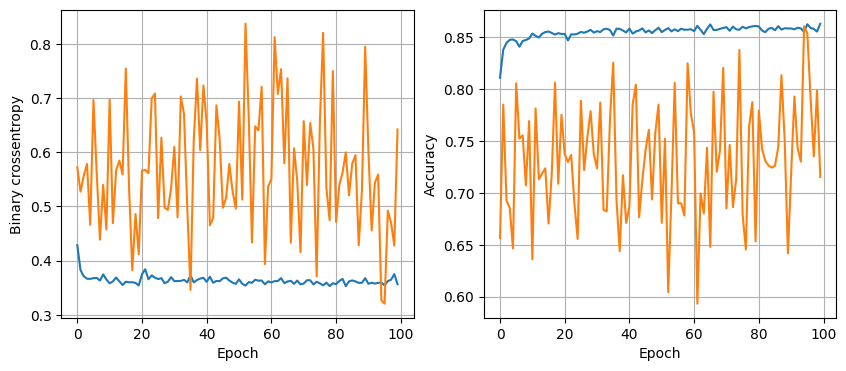

119/119 [==============================] - 1s 6ms/step - loss: 0.3543 - accuracy: 0.8628
val_loss: 0.3542656898498535
16 nodes, 0 dropout, 0.1 lr, 64 batch_size


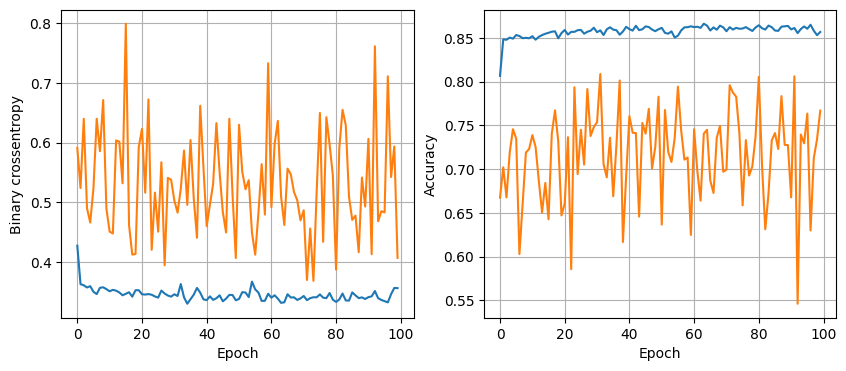

119/119 [==============================] - 1s 6ms/step - loss: 0.3487 - accuracy: 0.8657
val_loss: 0.34870919585227966
16 nodes, 0 dropout, 0.1 lr, 128 batch_size


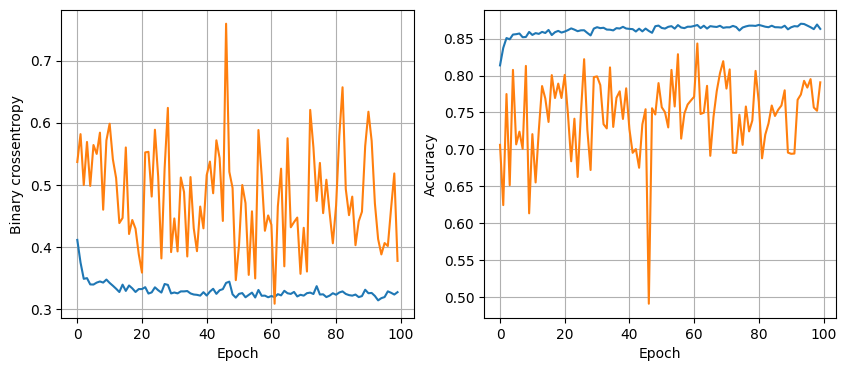

119/119 [==============================] - 1s 6ms/step - loss: 0.3683 - accuracy: 0.8601
val_loss: 0.36828067898750305
16 nodes, 0 dropout, 0.005 lr, 32 batch_size


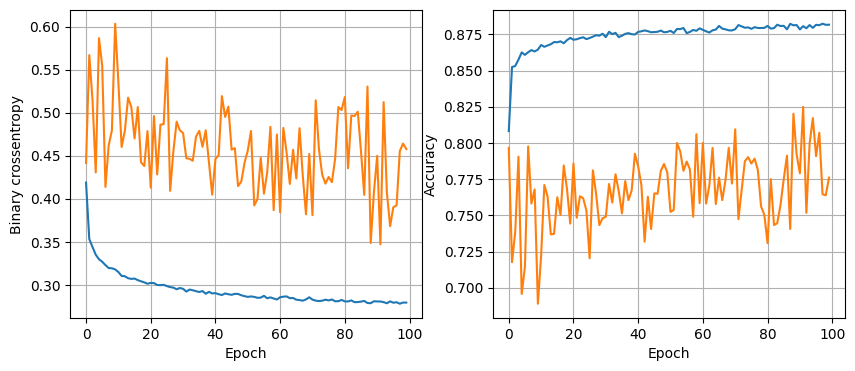

119/119 [==============================] - 1s 6ms/step - loss: 0.3265 - accuracy: 0.8696
val_loss: 0.3265417814254761
16 nodes, 0 dropout, 0.005 lr, 64 batch_size


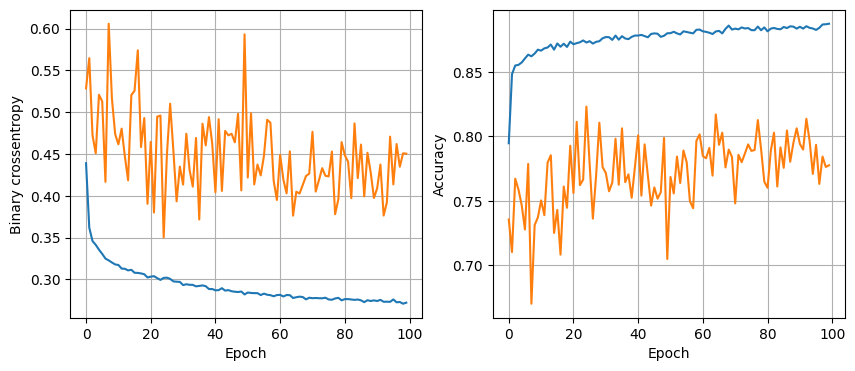

119/119 [==============================] - 1s 8ms/step - loss: 0.3161 - accuracy: 0.8757
val_loss: 0.3160516321659088
16 nodes, 0 dropout, 0.005 lr, 128 batch_size


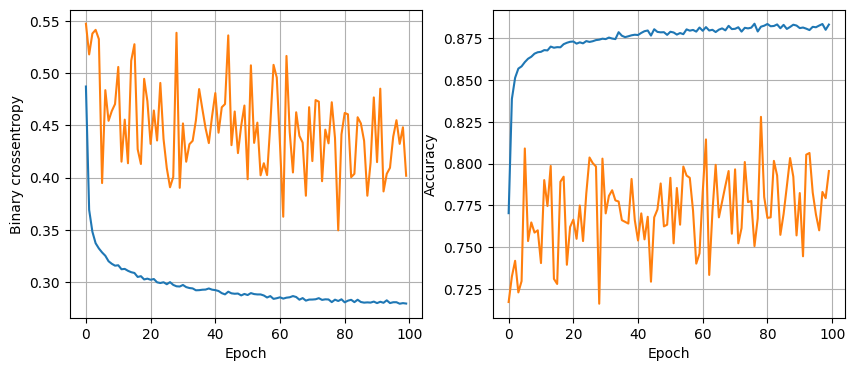

119/119 [==============================] - 1s 6ms/step - loss: 0.3222 - accuracy: 0.8675
val_loss: 0.32223841547966003
16 nodes, 0 dropout, 0.001 lr, 32 batch_size


KeyboardInterrupt: 

In [82]:
least_val_loss = float('inf')
least_val_loss_model = None
epochs = 100
for num_nodes in [16, 32, 64]:
    for dropout_prob in [0, 0.2]:
        for lr in [0.1, 0.005, 0.001]:
            for batch_size in [32, 64, 128]:
                print(f"{num_nodes} nodes, {dropout_prob} dropout, {lr} lr, {batch_size} batch_size")
                model, history = train_model(X_train, y_train, X_test, y_test, num_nodes, dropout_prob, lr, batch_size, epochs)
                plot_history(history)
                val_loss = model.evaluate(X_valid, y_valid)[0]
                print(f"val_loss: {val_loss}")
                if val_loss < least_val_loss:
                    least_val_loss = val_loss
                    least_val_loss_model = model
        

In [86]:
y_pred = least_val_loss_model.predict(X_test)
y_pred = np.where(y_pred > 0.5, 1, 0)
print(classification_report(y_test, y_pred))

119/119 [==============================] - 0s 2ms/step
              precision    recall  f1-score   support

           0       0.86      0.74      0.80      1341
           1       0.87      0.94      0.90      2463

    accuracy                           0.87      3804
   macro avg       0.87      0.84      0.85      3804
weighted avg       0.87      0.87      0.87      3804

